# Reference model

This notebook presents the reference model presented in our report. 


<br>

Authors of this notebook:
* Louis Allain
* Léonard Gousset
* Julien Heurtin

## Reference model without subsampling

In [14]:
import importing
from sklearn.decomposition import PCA
from GPy.kern import Matern52
from GPy.models.gp_regression import GPRegression
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score
import seaborn as sns
import matplotlib.pyplot as plt

#subsamplib = np.random.choice(29773, size = 50, replace = False)
train1000 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999]
test = [1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199]

blades_train = importing.r37_blades(ids = train1000)
print("Shape of the original blades array: ", blades_train.shape)

# Reshape the blade, this is the core of the reference model
reshape_blades_train = blades_train.reshape(blades_train.shape[0], -1)
print("Shape of the blades array for the reference model: ", reshape_blades_train.shape)

# Dimensionality Reduction
pca = PCA(n_components = 32)
X_train_pca = pca.fit_transform(reshape_blades_train)

# Load remaining of training data
x_scalars, y_train = importing.r37_scalars(ids = train1000, test = False)

# Keep only the efficiency (1:2 for the massflow and 2:3 for the compression ratio)
y_train = y_train[:, 0:1]

# Concatenate all training data and normalize it.
X_train = np.concatenate([x_scalars, X_train_pca], axis=1)
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
print("Shape of the training data for the reference model: ", X_train_.shape)


# Load test data and transform
blades_test = importing.r37_blades(ids = test)
print("\nShape of the original blades array (test data): ", blades_test.shape)


# Reshape according to the reference model and PCA transform
reshape_blades_test = blades_test.reshape(blades_test.shape[0], -1)
X_test_pca = pca.transform(reshape_blades_test)
print("Shape of the blades array for the reference model (test data): ", reshape_blades_test.shape)


# Load remaining of testing data
x_scalars, y_test = importing.r37_scalars(ids = test, test = True)
y_test = y_test[:, 0:1]
X_test = np.concatenate([x_scalars, X_test_pca], axis=1)
X_test_ = scaler.transform(X_test)
print("Shape of the testing data for the reference model: ", X_test_.shape)


Shape of the original blades array:  (1000, 29773, 3)
Shape of the blades array for the reference model:  (1000, 89319)
Shape of the training data for the reference model:  (1000, 34)

Shape of the original blades array (test data):  (200, 29773, 3)
Shape of the blades array for the reference model (test data):  (200, 89319)
Shape of the testing data for the reference model:  (200, 34)


### Training the reference model with Gaussian Processes

In [11]:
# Train Gaussian process
kernel = Matern52(input_dim = X_train_.shape[-1], ARD = True)
gp_model = GPRegression(X_train_, y_train, kernel)
print("Start GP training!")
gp_model.optimize_restarts(num_restarts = 10, messages = False, max_iters = 1000)

# Predictions on test sample
y_pred, _ = gp_model.predict(X_test_)
evs = explained_variance_score(y_test, y_pred)

Start GP training!


 /Users/louis/Library/CloudStorage/GoogleDrive-louis.allain@gmail.com/My Drive/Developer/GraduationProject/.venv/lib/python3.12/site-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in divide
 /Users/louis/Library/CloudStorage/GoogleDrive-louis.allain@gmail.com/My Drive/Developer/GraduationProject/.venv/lib/python3.12/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /Users/louis/Library/CloudStorage/GoogleDrive-louis.allain@gmail.com/My Drive/Developer/GraduationProject/.venv/lib/python3.12/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add
 /Users/louis/Library/CloudStorage/GoogleDrive-louis.allain@gmail.com/My Drive/Developer/GraduationProject/.venv/lib/python3.12/site-packages/GPy/kern/src/stationary.py:586: RuntimeWarning:invalid value encountered in multiply
 /Users/louis/Library/CloudStorage/GoogleDrive-louis.allain@gmail.com/My Drive/Developer/GraduationProject/.ven

Optimization restart 1/10, f = -5379.109803264812
Optimization restart 2/10, f = 1280.0804843351357
Optimization restart 3/10, f = 1280.0804865779237
Optimization restart 4/10, f = 1280.0803308691025
Optimization restart 5/10, f = 1280.0804853523257
Optimization restart 6/10, f = 1280.0804903296983
Optimization restart 7/10, f = 1280.0804220138275
Optimization restart 8/10, f = 1280.07903604799
Optimization restart 9/10, f = 1280.0801551445757
Optimization restart 10/10, f = 1280.0803246392566


### Plotting the performance of the reference model.

Text(0, 0.5, 'Predicted Values')

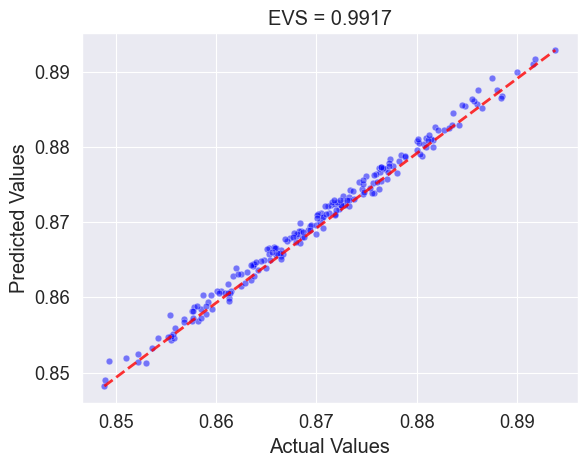

In [16]:
fig, ax = plt.subplots()
sns.set_theme(context='paper', font_scale=1.5)
sns.scatterplot(x=y_test.reshape(-1), y=y_pred.reshape(-1), color='blue', alpha=0.5)

## Adding the x=y line and the text
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color='red', linewidth=2, alpha = 0.8)

plt.title(f'EVS = {evs:.4f}')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

## Reference model with subsampling

In [18]:
train1000 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999]
test = [1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199]

blades_train = importing.r37_blades(ids = train1000)
print("Shape of the original blades array: ", blades_train.shape)

## Subsampling with stored optimized indices.
#train_sub_indices = np.load("indices_train.npy").astype(int)
#blades_train = blades_train[np.arange(blades_train.shape[0])[:, None], train_sub_indices, :][:, :200]

## Subsampling with random indices
random_subsample = np.random.choice(29773, size = 500, replace = False)
blades_train = blades_train[:, random_subsample, :]

print("Shape of the blades array after subsampling: ", blades_train.shape)


reshape_blades_train = blades_train.reshape(blades_train.shape[0], -1)
print("Shape of the blades array for the reference model: ", reshape_blades_train.shape)

# Dimensionality reduction
pca = PCA(n_components = 32)
X_train_pca = pca.fit_transform(reshape_blades_train)

# load training data
x_scalars, y_train = importing.r37_scalars(ids = train1000, test = False)
y_train = y_train[:, 0:1]
X_train = np.concatenate([x_scalars, X_train_pca], axis=1)
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
print("Shape of the training data for the reference model: ", X_train_.shape)




# Load test data and transform
blades_test = importing.r37_blades(ids = test)
print("Shape of the original blades array (test data): ", blades_test.shape)

## Subsampling with stored optimized indices
#test_sub_indices = np.load("indices_test.npy").astype(int)
#blades_test = blades_test[np.arange(blades_test.shape[0])[:, None], test_sub_indices, :][:, :200]

## Subsampling with random indices
blades_test = blades_test[:, random_subsample, :]
print("Shape of the blades array after subsampling (test data): ", blades_train.shape)

reshape_blades_test = blades_test.reshape(blades_test.shape[0], -1)
print("Shape of the blades array for the reference model (test data): ", reshape_blades_train.shape)

X_test_pca = pca.transform(reshape_blades_test)
x_scalars, y_test = importing.r37_scalars(ids = test, test = True)
y_test = y_test[:, 0:1]
X_test = np.concatenate([x_scalars, X_test_pca], axis=1)
X_test_ = scaler.transform(X_test)
print("Shape of the testing data for the reference model (test data): ", X_test_.shape)

Shape of the original blades array:  (1000, 29773, 3)
Shape of the blades array after subsampling:  (1000, 500, 3)
Shape of the blades array for the reference model:  (1000, 1500)
Shape of the training data for the reference model:  (1000, 34)
Shape of the original blades array (test data):  (200, 29773, 3)
Shape of the blades array after subsampling (test data):  (1000, 500, 3)
Shape of the blades array for the reference model (test data):  (1000, 1500)
Shape of the testing data for the reference model (test data):  (200, 34)


In [19]:
# Train Gaussian process
kernel = Matern52(input_dim = X_train_.shape[-1], ARD = True)
gp_model = GPRegression(X_train_, y_train, kernel)
print("Start GP training!")
gp_model.optimize_restarts(num_restarts = 10, messages = False, max_iters = 1000)

# Predictions on test sample
y_pred, _ = gp_model.predict(X_test_)
evs = explained_variance_score(y_test, y_pred)

Start GP training!


 /Users/louis/Library/CloudStorage/GoogleDrive-louis.allain@gmail.com/My Drive/Developer/GraduationProject/.venv/lib/python3.12/site-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in divide
 /Users/louis/Library/CloudStorage/GoogleDrive-louis.allain@gmail.com/My Drive/Developer/GraduationProject/.venv/lib/python3.12/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /Users/louis/Library/CloudStorage/GoogleDrive-louis.allain@gmail.com/My Drive/Developer/GraduationProject/.venv/lib/python3.12/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add
 /Users/louis/Library/CloudStorage/GoogleDrive-louis.allain@gmail.com/My Drive/Developer/GraduationProject/.venv/lib/python3.12/site-packages/GPy/kern/src/stationary.py:586: RuntimeWarning:invalid value encountered in multiply
 /Users/louis/Library/CloudStorage/GoogleDrive-louis.allain@gmail.com/My Drive/Developer/GraduationProject/.ven

Optimization restart 1/10, f = -5309.917131259615
Optimization restart 2/10, f = 1280.080457516539
Optimization restart 3/10, f = 1280.0804791046912
Optimization restart 4/10, f = 1280.0804590495181
Optimization restart 5/10, f = 1280.0804853646732
Optimization restart 6/10, f = 1280.0798373379876
Optimization restart 7/10, f = 1280.0804921195522
Optimization restart 8/10, f = 1280.0804091837228
Optimization restart 9/10, f = 1280.080347087859
Optimization restart 10/10, f = 1280.0804840513267


Text(0, 0.5, 'Predicted Values')

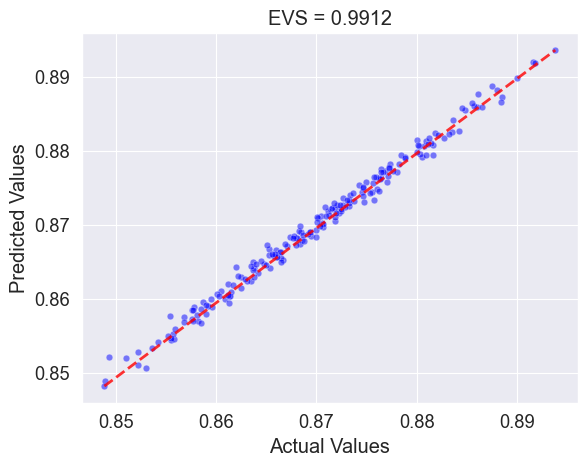

In [20]:
fig, ax = plt.subplots()
sns.set_theme(context='paper', font_scale=1.5)
sns.scatterplot(x=y_test.reshape(-1), y=y_pred.reshape(-1), color='blue', alpha=0.5)

## Adding the x=y line and the text
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color='red', linewidth=2, alpha = 0.8)

plt.title(f'EVS = {evs:.4f}')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')